In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [139]:
# import data from CSVs 
yelpparsed=pd.read_csv('../data/yelpdata.csv')
foursquareparsed=pd.read_csv('../data/foursqdata.csv')
citybikedata=pd.read_csv('../data/bikedata.csv')

In [140]:
# Rename for join
citybikedata.rename(columns={'name': 'station'}, inplace=True)
foursquareparsed.keys()

Index(['station', 'distance', 'name', 'location.address', 'rating',
       'popularity', 'categories', 'latitude', 'longitude'],
      dtype='object')

In [141]:
# Merge city bike data with Yelp parsed data
merged_df = pd.merge(
    foursquareparsed, 
    yelpparsed, 
    on=['location.address','categories'], 
    how='inner', 
    suffixes=('_foursq', '_yelp')
)
merged_df=merged_df.dropna()

In [142]:
print(f"Shape of the dataset: {merged_df.shape}")

Shape of the dataset: (145, 15)


In [143]:
print(merged_df.isnull().sum())

print(merged_df.describe())

print(merged_df.info())

station_foursq      0
distance_foursq     0
name_foursq         0
location.address    0
rating_foursq       0
popularity          0
categories          0
latitude_foursq     0
longitude_foursq    0
station_yelp        0
distance_yelp       0
name_yelp           0
rating_yelp         0
latitude_yelp       0
longitude_yelp      0
dtype: int64
       distance_foursq  rating_foursq  popularity  latitude_foursq  \
count       145.000000     145.000000  145.000000       145.000000   
mean        311.413793       7.402759    0.964562        38.899937   
std         108.350613       0.945306    0.067178         0.044755   
min          25.000000       5.400000    0.283725        38.764900   
25%         238.000000       6.900000    0.964264        38.879610   
50%         307.000000       7.400000    0.979448        38.882492   
75%         402.000000       8.100000    0.985221        38.929650   
max         485.000000       9.100000    0.999041        39.040563   

       longitude_foursq  d

In [144]:
merged_df=merged_df.rename(columns={'station_foursq':'station'})

In [145]:
# Merge the previous result with city bikes parsed data
final_df = pd.merge(
    merged_df, 
    citybikedata, 
    on=['station'], 
    how='inner', 
    suffixes=('', '_city')
)

# Rename columns for clarity
final_df = final_df.rename(
    columns={
        'distance': 'distanceyelp',
        'name': 'poiname',
        'rating': 'ratingyelp',
        'popularity': 'popularityfoursq'
    }
)

In [146]:
final_df.head()

,station,distance_foursq,name_foursq,location.address,rating_foursq,popularityfoursq,categories,latitude_foursq,longitude_foursq,station_yelp,...,renting,returning,last_updated,has_ebikes,ebikes,payment,payment-terminal,slots.1,rental_uris.android,rental_uris.ios
0,Fairfax Dr & Wilson Blvd,97,The Liberty Tavern,3195 Wilson Blvd,8.5,0.982103,bar,38.886352,-77.096879,Fairfax Dr & Wilson Blvd,...,1,1,1729555616,True,0,"['key', 'creditcard']",True,12,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan
1,Fairfax Dr & Wilson Blvd,442,Screwtop Wine Bar,1025 N Fillmore St,8.5,0.965967,bar,38.885366,-77.092691,Fairfax Dr & Wilson Blvd,...,1,1,1729555616,True,0,"['key', 'creditcard']",True,12,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan
2,Fairfax Dr & Wilson Blvd,157,Don Tito,3165 Wilson Blvd,7.3,0.988598,bar,38.886695,-77.096409,Fairfax Dr & Wilson Blvd,...,1,1,1729555616,True,0,"['key', 'creditcard']",True,12,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan
3,Fairfax Dr & Wilson Blvd,311,East West Coffee Wine,3101 Wilson Blvd,7.5,0.973212,bar,38.887544,-77.095360,Fairfax Dr & Wilson Blvd,...,1,1,1729555616,True,0,"['key', 'creditcard']",True,12,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan
4,Fairfax Dr & Wilson Blvd,460,Wilson Hardware Kitchen & Bar,2915 Wilson Blvd,7.3,0.967093,bar,38.888531,-77.093736,Fairfax Dr & Wilson Blvd,...,1,1,1729555616,True,0,"['key', 'creditcard']",True,12,https://dc.lft.to/lastmile_qr_scan,https://dc.lft.to/lastmile_qr_scan


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

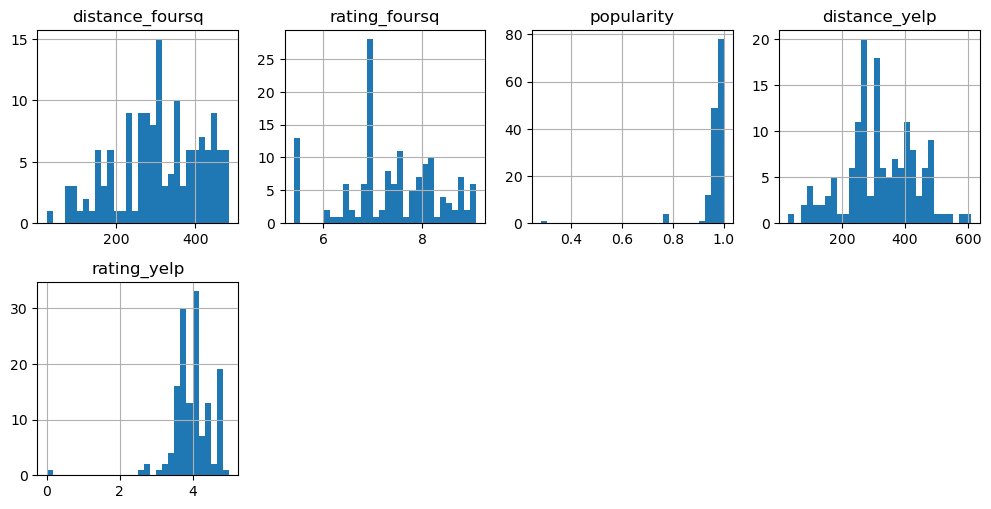

In [147]:
# Drop unnecessary columns for plotting
plot_columns = merged_df.drop(['latitude_foursq','latitude_yelp','longitude_yelp', 'longitude_foursq'], axis=1)


# Create histograms for the remaining columns
plot_columns.hist(bins=30, figsize=(10, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

Even if we wanted to replace popularity for ratings for Foursquare, they are mostly 9's with very little variation. The results are skewed significantly. 

In [148]:
# Create CSV for future steps
final_df.to_csv('../data/final_df.csv', index=False)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [53]:
import sqlite3
from sqlite3 import Error as e

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection successful")
    except Error as e:
        print(f'The error {e}')
    return connection



connection = create_connection('../data/db')

Connection successful


creating function to execute queries

In [54]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as e:
        print(f"The error '{e}' occurred")

Creating and filling in stations table

In [55]:
create_stations_table = """
CREATE TABLE IF NOT EXISTS stations (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  latitude INTEGER,
  longitude INTEGER,
  free_bikes INTEGER,
  empty_slots INTEGER,
  total_bike_cap INTEGER
); """

execute_query(connection, create_stations_table)  


Query successful


In [56]:
cursor = connection.cursor()
for index, row in citybikedata.iterrows():
    create_station = """
    INSERT INTO 
        stations(name, latitude, longitude, free_bikes, empty_slots, total_bike_cap)
    VALUES
        (?, ?, ?, ?, ?, ?)
    """
    cursor.execute(create_station, (
        row['station'], 
        row['latitude'], 
        row['longitude'], 
        row['free_bikes'], 
        row['empty_slots'], 
        row['total_bike_cap']
    ))
connection.commit()


Creating and inserting yelp table

In [57]:
create_yelp_table = """
CREATE TABLE IF NOT EXISTS yelp (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  station TEXT NOT NULL,
  distance INTEGER,
  name TEXT NOT NULL,
  address TEXT,
  rating DECIMAL
); """

execute_query(connection, create_yelp_table)  


Query successful


In [58]:
for index, row in yelpparsed.iterrows():
    create_yelp = """
    INSERT INTO 
        yelp(station, distance, name, address, rating)
    VALUES
        (?, ?, ?, ?, ?)
    """
    cursor.execute(create_yelp, (
        row['station'], 
        row['distance'], 
        row['name'], 
        row['location.address'], 
        row['rating']
    ))
connection.commit()


Creating and filling Foursquare table

In [59]:
create_foursq_table = """
CREATE TABLE IF NOT EXISTS foursq (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  station TEXT NOT NULL,
  distance INTEGER,
  name TEXT NOT NULL,
  address TEXT,
  rating DECIMAL,
  popularity DECIMAL,
  categories TEXT
); """

execute_query(connection, create_foursq_table)  


Query successful


In [60]:
for index, row in foursquareparsed.iterrows():
    create_foursq = """
    INSERT INTO 
        foursq(station, distance, name, address, rating, popularity, categories)
    VALUES
        (?, ?, ?, ?, ?, ?, ?)
    """
    cursor.execute(create_foursq, (
        row['station'], 
        row['distance'], 
        row['name'], 
        row['location.address'], 
        row['rating'],
        row['popularity'],
        row['categories']
    ))
connection.commit()


Look at the data before and after the join to validate your data.

In [61]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [62]:
query = "SELECT * FROM foursq"
execute_read_query(connection, query)

[(1,
  'Fairfax Dr & Wilson Blvd',
  97,
  'The Liberty Tavern',
  '3195 Wilson Blvd',
  8.5,
  0.982388775009383,
  'bar'),
 (2,
  'Fairfax Dr & Wilson Blvd',
  240,
  'Lyon Hall',
  '3100 Washington Blvd',
  8.5,
  0.9821866789849004,
  'bar'),
 (3,
  'Fairfax Dr & Wilson Blvd',
  131,
  'The Lot',
  '3217 10th St N',
  8,
  0.9721107486214164,
  'bar'),
 (4,
  'Fairfax Dr & Wilson Blvd',
  62,
  "O'Sullivan's Irish Pub",
  '3207 Washington Blvd',
  7.5,
  0.980685394231602,
  'bar'),
 (5,
  'Fairfax Dr & Wilson Blvd',
  442,
  'Screwtop Wine Bar',
  '1025 N Fillmore St',
  8.5,
  0.9652106129283714,
  'bar'),
 (6,
  'Fairfax Dr & Wilson Blvd',
  200,
  'Pamplona',
  '3100 Clarendon Blvd',
  7.7,
  0.9549037156797644,
  'bar'),
 (7,
  'Fairfax Dr & Wilson Blvd',
  426,
  'The Board Room',
  '925 N Garfield St',
  8.2,
  0.9720241360394952,
  'bar'),
 (8,
  'Fairfax Dr & Wilson Blvd',
  157,
  'Don Tito',
  '3165 Wilson Blvd',
  7.3,
  0.9886248809076998,
  'bar'),
 (9,
  'Fairfax Dr 

I would execute a join statment to see the same results as a merged dataframe. The query would be as follows

In [63]:
query = """
SELECT s.station
FROM stations as s
JOIN yelp as y
ON s.station = y.station
"""